In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
%matplotlib inline

In [4]:
yelp = pd.read_csv('yelp.csv')
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [5]:
#too many jagons
yelp.drop(yelp[['business_id','review_id','user_id']],inplace=True, axis= 1)

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
date      10000 non-null object
stars     10000 non-null int64
text      10000 non-null object
type      10000 non-null object
cool      10000 non-null int64
useful    10000 non-null int64
funny     10000 non-null int64
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


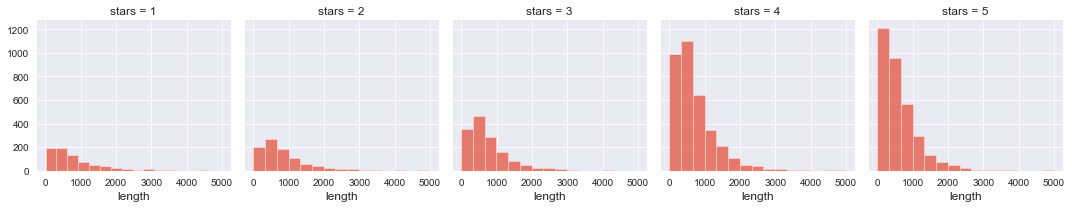

In [8]:
yelp['length']= yelp['text'].apply(len)
p=sns.FacetGrid(yelp,col='stars',)
p=p.map(plt.hist,'length',bins=15,alpha=0.7)

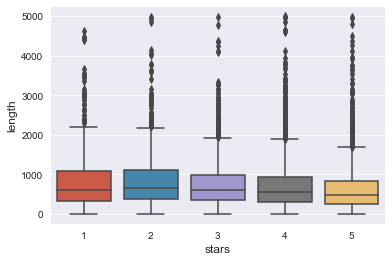

In [9]:
sns.boxplot('stars','length',data=yelp)

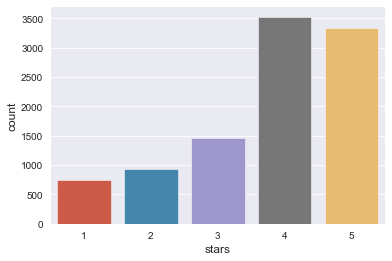

In [10]:
sns.countplot(x='stars',data=yelp)

In [11]:
yelp.columns

Index(['date', 'stars', 'text', 'type', 'cool', 'useful', 'funny', 'length'], dtype='object')

In [12]:
 yelp.groupby(by='stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
corr = yelp.groupby(by='stars').mean().corr()
corr

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


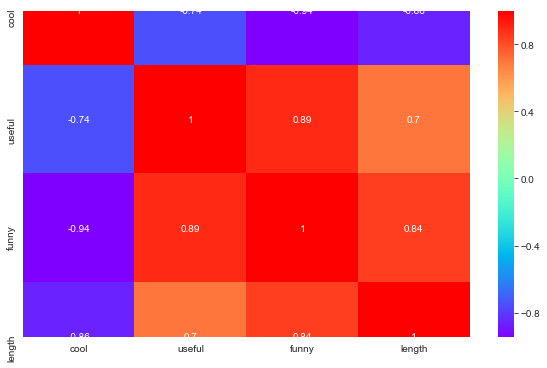

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='rainbow',annot=True)

In [15]:
yelp_class = yelp[(yelp['stars']==5) | (yelp['stars']==1)]

In [16]:
yelp_class

,date,stars,text,type,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469
6,2010-02-12,5,Drop what you're doing and drive here. After I...,review,7,7,4,1565
...,...,...,...,...,...,...,...,...
9990,2011-10-03,5,Yes I do rock the hipster joints. I dig this ...,review,1,1,1,263
9991,2011-12-05,5,Only 4 stars? \n\n(A few notes: The folks that...,review,1,1,0,908
9992,2009-03-10,5,I'm not normally one to jump at reviewing a ch...,review,2,3,2,1326
9994,2012-03-19,5,Let's see...what is there NOT to like about Su...,review,1,2,1,1968


In [17]:
X = yelp_class['text']
y = yelp_class['stars']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vec = CountVectorizer()

In [21]:
X = vec.fit_transform(X)

In [33]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model = MultinomialNB().fit(train_X,train_y)

In [26]:
prediction = model.predict(test_X)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [29]:
#using text processing
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
pipe = Pipeline([('bow',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])

In [32]:
X = yelp_class['text']
y = yelp_class['stars']

In [34]:
 train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=101)

In [35]:
pipe.fit(train_X,train_y)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [36]:
pred = pipe.predict(test_X)

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\hp\Anaconda3.0\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
